In [1]:
!pip install opencv-python

In [1]:
import cv2

In [2]:
img = cv2.imread('profilepic.jpg')

In [3]:
img.shape # (rows, columns, rgb color)

(164, 307, 3)

In [4]:
img[0] #first row of image

array([[ 57,  83,  69],
       [ 60,  86,  72],
       [ 66,  92,  78],
       [ 72,  98,  84],
       [ 75, 104,  88],
       [ 77, 106,  90],
       [ 78, 108,  89],
       [ 78, 109,  88],
       [ 90, 123, 102],
       [ 91, 125, 101],
       [ 89, 126, 100],
       [ 91, 128, 102],
       [ 92, 130, 102],
       [ 93, 131, 103],
       [ 92, 132, 104],
       [ 92, 133, 102],
       [ 97, 136, 104],
       [ 96, 136, 101],
       [ 95, 134, 102],
       [ 93, 132, 100],
       [ 91, 129,  99],
       [ 89, 127,  97],
       [ 88, 126,  98],
       [ 87, 125,  97],
       [ 83, 120,  94],
       [ 88, 125,  99],
       [ 95, 131, 107],
       [100, 136, 112],
       [ 99, 135, 113],
       [ 94, 130, 108],
       [ 87, 122, 102],
       [ 81, 116,  96],
       [ 80, 113,  92],
       [ 76, 109,  88],
       [ 70, 104,  80],
       [ 64,  99,  73],
       [ 61,  96,  70],
       [ 60,  95,  68],
       [ 63,  95,  70],
       [ 65,  97,  73],
       [ 64,  92,  72],
       [ 59,  86

In [5]:
import matplotlib.pyplot as plt

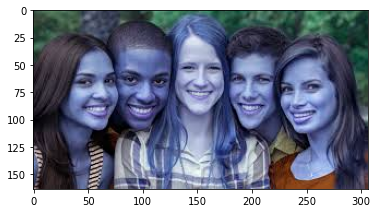

In [6]:
plt.imshow(img)

In [7]:
#cv2.imshow('result', img) #(new window name, image to be opened) => Not responding

In [8]:
 while True:
    cv2.imshow('result', img)
    if cv2.waitKey(2)==27: # 27 is ASCII value of Escape, hence window will be closed only if you presss escape key
        break
cv2.destroyAllWindows()

In [9]:
haar_data = cv2.CascadeClassifier('data.xml')

In [10]:
haar_data.detectMultiScale(img)

array([[123,  30,  60,  60],
       [169,  41,  61,  61],
       [ 29,  42,  60,  60],
       [ 69,  37,  70,  70],
       [216,  48,  62,  62]], dtype=int32)

In [11]:
#cv2.rectangle(img, (x,y), (w,h), (b,g,r), border_thickness) -> to draw a rectangle around the face

In [12]:
 while True:
    faces = haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
    cv2.imshow('result', img)
    if cv2.waitKey(2)==27: # 27 is ASCII value of Escape, hence window will be closed only if you presss escape key
        break
cv2.destroyAllWindows()

In [14]:
import numpy as np

In [15]:
x = np.array([3,2,4,5])
x

array([3, 2, 4, 5])

In [16]:
x[0:3]

array([3, 2, 4])

In [17]:
# 2D array
x = np.array([[1,2,3,4,5,6], [7,8,9,10,11,12], [13,14,15,16,17,18], [19,20,21,22,23,24]])
x

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [18]:
#slicing operations in 2D array

In [19]:
x[0]

array([1, 2, 3, 4, 5, 6])

In [20]:
x[0][1:4]

array([2, 3, 4])

In [21]:
# x[indices of rows, indices of columns]
x[0:3, 0:3]

array([[ 1,  2,  3],
       [ 7,  8,  9],
       [13, 14, 15]])

In [22]:
x[:, 1:4]

array([[ 2,  3,  4],
       [ 8,  9, 10],
       [14, 15, 16],
       [20, 21, 22]])

In [24]:
#to collect our face data without a mask

#to collect data from a video give the pathname of the video instead of 0 in VideoCapture()
capture = cv2.VideoCapture(1) #opens camera, 0 for default camera, 1 for other camera
data = []

while True:
    flag, img = capture.read() #returns flag->true if camera working properly, img->our face image
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
            #for slicing the face
            face = img[y:y+h, x:x+w, :] #3D array slicing
            #making all the faces as same dimensions
            face = cv2.resize(face, (50,50))
            print(len(data)) #prints no. of faces collected
            if len(data) < 400: #collects less than 400 faces
                data.append(face) #appends the faces into data array
        cv2.imshow('result', img)
        #27 is ASCII value of Escape, hence window will be closed only if you presss escape key
        # when max 200 faces are collected the loop breaks
        if cv2.waitKey(2)==27 or len(data)>=200: 
            break
            
capture.release() #releases the camera
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [25]:
np.save('without_mask.npy', data) #saves all the 200 face data captured from the above code from data to the .npy file

In [30]:
#The same thing is repeated by wearing a mask to collect our face data with mask


capture = cv2.VideoCapture(1) #opens camera, 0 for default camera, 1 for other camera
data = []

while True:
    flag, img = capture.read() #returns flag->true if camera working properly, img->our face image
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 4)
            #for slicing the face
            face = img[y:y+h, x:x+w, :] #3D array slicing
            #making all the faces as same dimensions
            face = cv2.resize(face, (50,50))
            print(len(data)) #prints no. of faces collected
            if len(data) < 400: #collects less than 400 faces
                data.append(face) #appends the faces into data array
        cv2.imshow('result', img)
        #27 is ASCII value of Escape, hence window will be closed only if you presss escape key
        # when max 200 faces are collected the loop breaks
        if cv2.waitKey(2)==27 or len(data)>=200: 
            break
            
capture.release() #releases the camera
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [31]:
np.save('with_mask.npy', data) #saves all the 200 face data captured from the above code from data to the .npy file

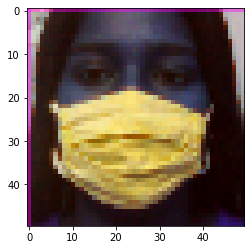

In [35]:
plt.imshow(data[1])